<a href="https://colab.research.google.com/github/chelsea-she/chelsea_CodeNinjas/blob/main/WELFake_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uploading our database

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/InspiritAI 1:1'
#filepath = '/content/drive/MyDrive/InspiritAI/Students/Chelsea She'
os.chdir(filepath)

In [ ]:
wf = pd.read_csv("https://zenodo.org/record/4561253/files/WELFake_Dataset.csv") #take 6m 56s to run :/

In [ ]:
wf = pd.read_csv("WELFake_Dataset.csv") #using the file in our google drive

In [ ]:
del wf['Unnamed: 0'] #deleting the extra row

(0 = fake and 1 = real)

In [ ]:
#!git clone https://github.com/archersama/3rd-solution-COVID19-Fake-News-Detection-in-English.git

##Basic dataset analysis

In [ ]:
np.unique(wf['label'], return_counts=True) #pretty even split of true + false news

(array([0, 1]), array([35028, 37106]))

In [ ]:
switched_labels = []
for i in wf['label']:
  if i == 0:
    switched_labels.append(1)
  else:
    switched_labels.append(0)
wf['labels'] = switched_labels
del wf['label']
wf

,title,text,labels
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,NaN,Did they post their votes for Hillary already?,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",0
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,1
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,1


analyzing word length of full article text and title

In [ ]:
def get_word_length(text):
  if type(text) == float: return 0
  words = text.split()
  return len(words)

In [ ]:
wf['length'] = wf['text'].apply(get_word_length)

In [ ]:
wf['title_length'] = wf['title'].apply(get_word_length)

Text(0.5, 0, '# of words')

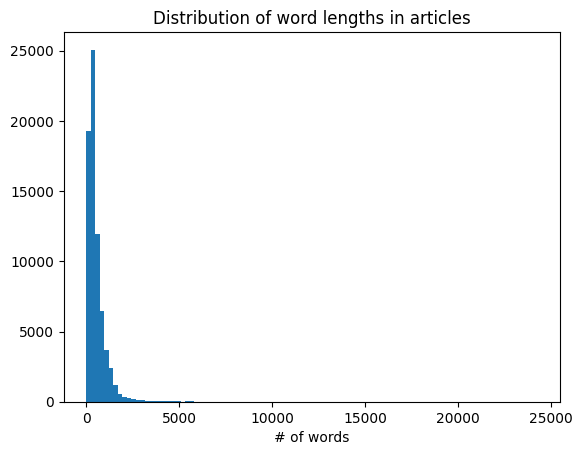

In [ ]:
plt.hist(wf['length'], bins=100);
plt.title("Distribution of word lengths in articles")
plt.xlabel("# of words")

Text(0.5, 0, '# of words')

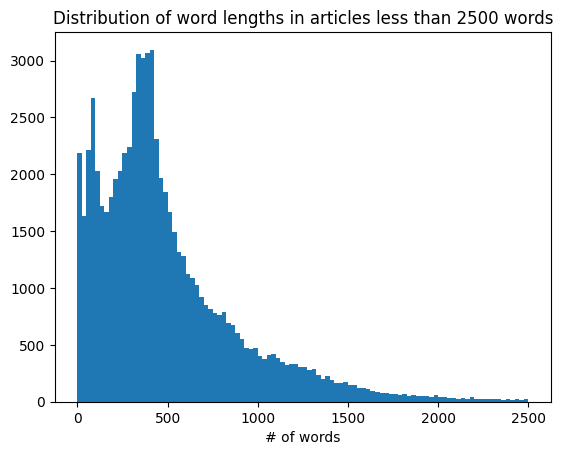

In [ ]:
plt.hist(list(wf[wf['length']<2500]['length']), bins=100);
plt.title("Distribution of word lengths in articles less than 2500 words")
plt.xlabel("# of words")

Text(0.5, 0, '# of words to the power of 10')

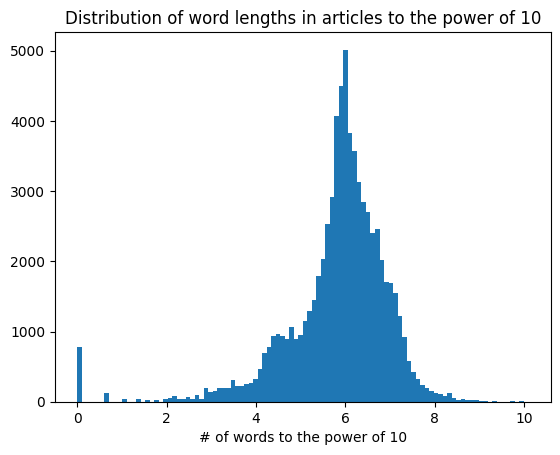

In [ ]:
plt.hist(np.log(wf['length']+1), bins=100);
plt.title("Distribution of word lengths in articles to the power of 10")
plt.xlabel("# of words to the power of 10")

In [ ]:
print("Average word length: ", np.mean(wf['length']))
print("Minimum word length: ", np.min(wf['length']))
print("Maximum word length: ", np.max(wf['length']))

Average word length:  540.5509329858319
Minimum word length:  0
Maximum word length:  24234


In [ ]:
#looking at top 5 max + min word lengths
sorted_by_views = wf.sort_values(by="length")
print(sorted_by_views["label"])
print(sorted_by_views["length"])
print(sorted_by_views["title"])
print(len(list(wf[wf['length']==0]['length'])))

59749    1
2909     1
56866    1
53510    1
9306     1
        ..
17557    1
6445     1
54433    1
34523    1
327      1
Name: label, Length: 72134, dtype: int64
59749        0
2909         0
56866        0
53510        0
9306         0
         ...  
17557    20084
6445     20876
54433    20891
34523    20891
327      24234
Name: length, Length: 72134, dtype: int64
59749    Pro-sovereignty Legislators Demand That Admini...
2909                 A Fifth Clinton Presidency? Hill, No!
56866                           Huma’s Weiner Dogs Hillary
53510    KIMBERLY GUILFOYLE: Serious Legal Issues Surro...
9306     FLASHBACK: CHICAGO RESIDENT Blasts Chicago May...
                               ...                        
17557    Re: How Many People Will Have To Migrate Out O...
6445     Заседание Международного дискуссионного клуба ...
54433    Re: Why Are So Many People Choosing To Leave T...
34523    Re: Why Are So Many People Choosing To Leave T...
327      Re: The Hard Working American vs

Text(0.5, 0, '# of words')

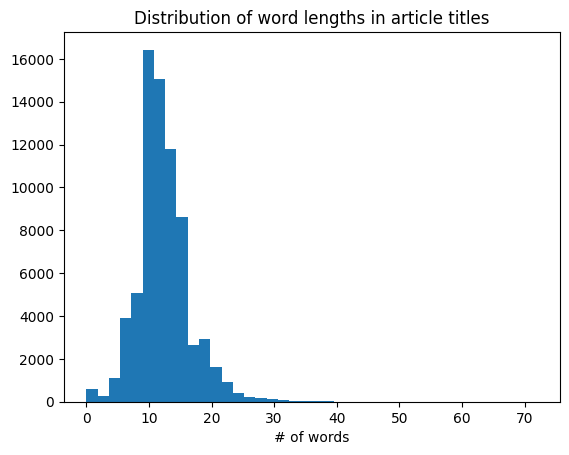

In [ ]:
plt.hist(wf['title_length'], bins=40);
plt.title("Distribution of word lengths in article titles")
plt.xlabel("# of words")

In [ ]:
tl = wf.groupby(by="title_length", as_index=False).agg({"label":"count"})

Text(0, 0.5, 'total sum of true/false label')

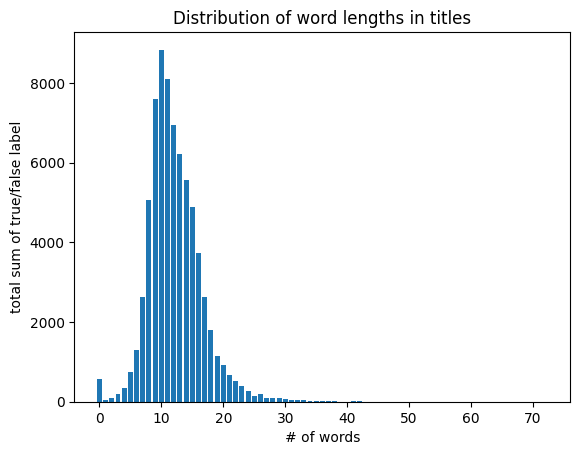

In [ ]:
plt.bar(x=tl['title_length'], height=tl['label']);
plt.title("Distribution of word lengths in titles")
plt.xlabel("# of words")
plt.ylabel("total sum of true/false label")

In [ ]:
print("Average word length: ", np.mean(wf['title_length']))
print("Minimum word length: ", np.min(wf['title_length']))
print("Maximum word length: ", np.max(wf['title_length']))
print(len(list(wf[wf['title_length']==0]['title_length'])))

Average word length:  12.173316327945214
Minimum word length:  0
Maximum word length:  72
558


In [ ]:
#looking at top 5 max + min title lengths
sorted_by_views = wf.sort_values(by="title_length")
print(sorted_by_views["label"])
print(sorted_by_views["title_length"])

56319    1
64393    1
69294    1
49856    1
12765    1
        ..
29831    1
71215    1
29935    1
44714    1
37207    1
Name: label, Length: 72134, dtype: int64
56319     0
64393     0
69294     0
49856     0
12765     0
         ..
29831    49
71215    53
29935    53
44714    58
37207    72
Name: title_length, Length: 72134, dtype: int64


# Dataset Preprocessing

In [ ]:
wf[wf['length']==0] #checking number of null values of articles

,title,text,labels,length,title_length,article
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,0,0,12,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,0,0,10,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...
325,Ohio State University Student Says Terrorist A...,,0,0,13,Ohio State University Student Says Terrorist A...
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,0,0,16,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,0,0,17,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...
...,...,...,...,...,...,...
71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,0,0,11,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,0,0,13,WATCH TUCKER CARLSON Scorch Sanctuary City May...
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,0,0,15,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,0,0,9,BILL O’REILLY Destroys Liberal Pundit On Trump...


wf["article"] is adding title and text together, getting rid of NA indices


In [ ]:
wf['article'] = wf['title'].fillna("") + " " + wf['text'].fillna("")
for i in wf['article']:
  if i == "":
    del i

## Lemmatizing, getting rid of stopwords, and lowercasing everything

In [ ]:
lemmatize = False
stopword = True
lowercase = True

In [ ]:
%%capture
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_md
!pip install en_core_web_sm-3.1.0-py3-none-any.whl
import en_core_web_md

text_to_nlp = en_core_web_md.load() # loading in the model

In [ ]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (token.lemma_ != '-PRON-'):
            clean_tokens.append(token)
    return np.array(clean_tokens)

In [ ]:
def doc_to_vec(text):

    title = tokenize_vecs(text) # returns cleaned list of spacy tokens
    title_vec = [0]*300
    found = 0
    for word in title:
      if np.sum(word.vector) > 0:
        title_vec += word.vector
        found += 1
    if found > 0:
      title_vec /= found
    return title_vec

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#stopword removal and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [ ]:
def simplify_pos(pos):
  if pos[0] in ["I", "J", "F", "M", "D", "P", "C", "W", "T", "E", "U", "L"] : return "n"
  return pos[0].lower()

## Applying it to our dataset

A tokenizer might split "don't" into ['do', "n't"] vs A split function will keep "don't" intact

(we got rid of lemmatizing to save time and to process our text properly)

In [ ]:
def preprocess(text):
    tokens = word_tokenize(text)
    #tags = nltk.pos_tag(word_tokenize(text))
    #tags = [pair for pair in tags if pair[1] != "POS" and pair[1].isalpha()]

    #if lemmatize: tokens = [lemmatizer.lemmatize(word[0], simplify_pos(word[1])) for word in tags]
    #else : tokens = [word[0] for word in tags]

    tokens = [word for word in tokens if word.isalpha()]
    if lowercase: tokens = [word.lower() for word in tokens]
    if stopword: tokens = [word for word in tokens if not word in set(stopwords)]

    #return tokens
    return ' '.join(tokens)

In [ ]:
wf['article_cleaned'] = wf['article'].apply(preprocess)

In [ ]:
wf = wf[["article_cleaned", "length", "title_length", "labels"]]

In [ ]:
wf.to_csv("wf.csv", index=False)

In [ ]:
np.unique(wf['labels'], return_counts=True)

(array([0, 1]), array([37106, 35028]))

##Another preprocessing function (don't use)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
import string

In [ ]:
def process_lang_data(text):
  '''
    For a given text, go through the process of tokenizing, removing stopwords,
    stemming / lemmatization, and removing punctuation. Return the cleaned text.
  '''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  ### YOUR CODE HERE ###
  for token in word_tokenize(text):
      if token not in punctuation and token not in our_stopwords:
        clipped_token = lemmatizer.lemmatize(token)
        cleaned_text.append(clipped_token)
  ### END YOUR CODE  ###

  return cleaned_text

print(wf["article"].iloc[0])
print(process_lang_data(wf["article"].iloc[0]))

wf['article'].apply(process_lang_data)

## Train + Test split

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(wf["article_cleaned"], wf["label"], test_size=0.2, random_state=9)

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# print(X_train)

##Vectorize and Analyze


###CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=1000)
bow_train = bow.fit_transform(X_train).toarray() # transforming both training and testing data
bow_test = bow.transform(X_test).toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(bow_train, y_train)
y_pred = rf.predict(bow_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("FP: ", fp) #false positive, meaning something false was labeled as true
print("FN: ", fn) #false negative, meaning something true was labeled as false


In [ ]:
p=tp/(tp+fp) #precision
print("Precision: ", p)

r=tp/(tp+fn) #recall
print("Recall: ", r)

f1=2*p*r/(p+r) #f1-score
print("F1: ", f1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import seaborn as sns

# clf = SVC(random_state=0)
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Fake","Real"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(8,6))
  res = sns.heatmap(df_cm, annot=True,cmap='viridis', fmt='g')
  plt.yticks([0.5,1.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

plot_confusion_matrix(y_test, y_pred)

###TfidfVectorizer (TF-IDF) (we don't analyze this one)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=process_lang_data, max_features=1000)
tfidf.fit(X_train)
tfidf_train = tfidf.transform(X_train).toarray()
tfidf_test = tfidf.transform(X_test).toarray()

###Word2Vec
This creates vectors from scratch which makes it seem like it's treating the whole enlglish language is solely in this dataset. We will analyze the word2vec spacy instead which will use a premade vector dictionary to vectorize

In [ ]:
import gensim

# take a look at the documentation to see what these parameters are changing!
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, window = 5, sg = 1)
w2vec_model.train(tokenize, total_examples = len(wf['article']),epochs=20)

In [ ]:
words = list(w2vec_model.wv.index_to_key)
print(words)

In [ ]:
w2v_vectors = []
for word in w2vec_model:
    w2v_vectors.append(w2vec_model.wv.get_index(word))

###Word2Vec - with spacy

In [ ]:
wf['d2v'] = wf['article_cleaned'].apply(doc_to_vec) #took 1 hr 25 min to run ://///

In [ ]:
w2v_Xtrain, w2v_Xtest, w2v_ytrain, w2v_ytest = train_test_split(wf["d2v"], wf["label"], test_size=0.2, random_state=9)

In [ ]:
wf['d2v']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
X = np.array(w2v_Xtrain.tolist())
y = np.array(w2v_ytrain.tolist())
rf.fit(X, y)
Xtest = np.array(w2v_Xtest.tolist())
w2v_ypred = rf.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(w2v_ytest, w2v_ypred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(w2v_ytest, w2v_ypred).ravel()
print("FP: ", fp) #false positive, meaning something false was labeled as true
print("FN: ", fn) #false negative, meaning something true was labeled as false

In [ ]:
p=tp/(tp+fp) #precision
print("Precision: ", p)

r=tp/(tp+fn) #recall
print("Recall: ", r)

f1=2*p*r/(p+r) #f1-score
print("F1: ", f1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

plot_confusion_matrix(w2v_ytest, w2v_ypred)

#Most Frequent Words Visualizer

In [ ]:
import seaborn as sns

In [ ]:
from collections import Counter

def plot_most_freq_words(text, group):
  # try changing to visualize more or less words
  num_words = 15

  # We can use Counter to find the most frequent words in all our titles!
  words = [_[0] for _ in Counter(text).most_common(num_words)]
  frequency = [_[1] for _ in Counter(text).most_common(num_words)]

  # Making our plot look nice!
  plt.figure(figsize=(8,6));
  ax = sns.barplot(x=frequency, y=words)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.title("Most frequent words in "+group);
  plt.xlabel("Frequency", fontsize=14);
  plt.yticks(fontsize=14);
  plt.xticks(fontsize=14);


In [ ]:
wf_false_words = []
wf_true_words = []
for i in range(0,len(wf),1):
  split_ac = wf["article_cleaned"].iloc[i].split()
  for word in split_ac:
    if wf["labels"].iloc[i]==0:
      wf_false_words.append(word)
    else:
      wf_true_words.append(word)

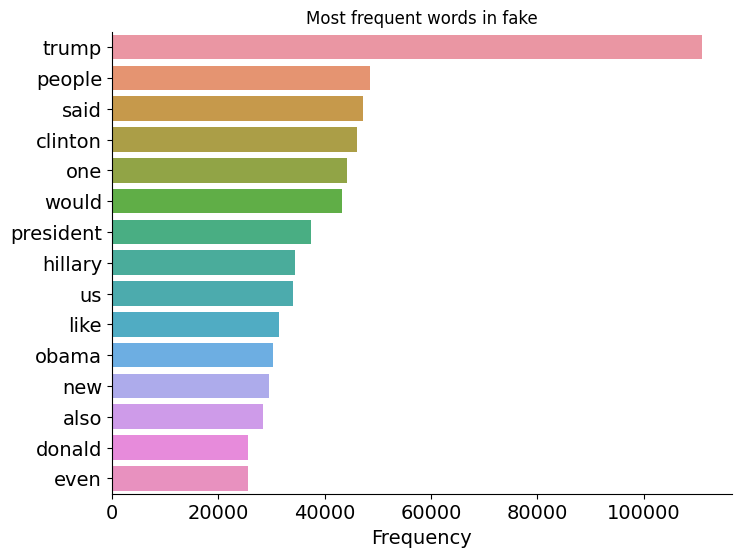

In [ ]:
plot_most_freq_words(wf_false_words, "fake")

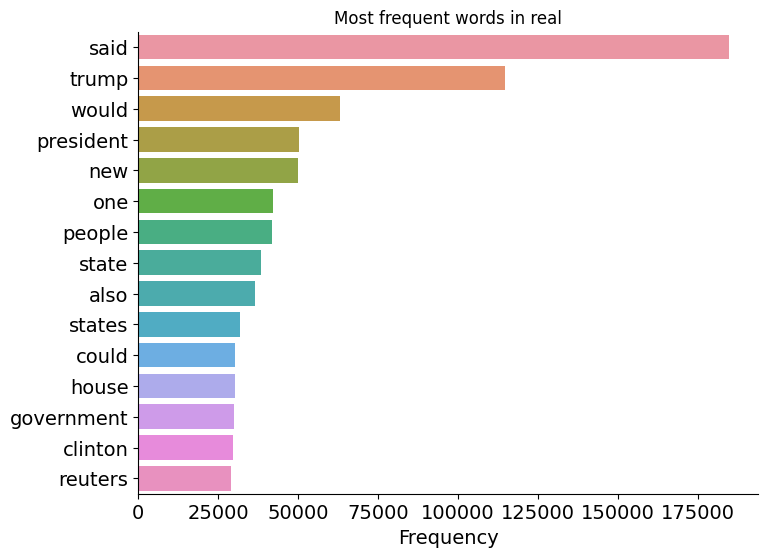

In [ ]:
plot_most_freq_words(wf_true_words, "real")

In [ ]:
from wordcloud import WordCloud, STOPWORDS

False Word Cloud


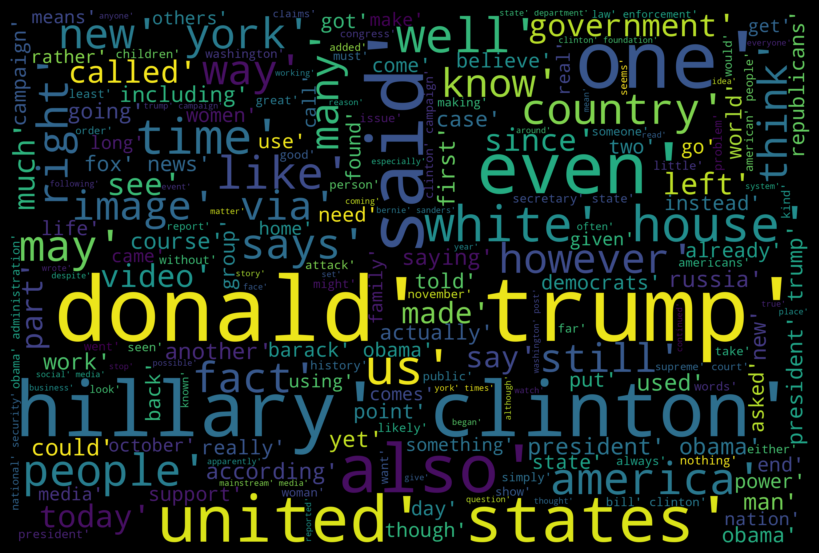

True Word Cloud


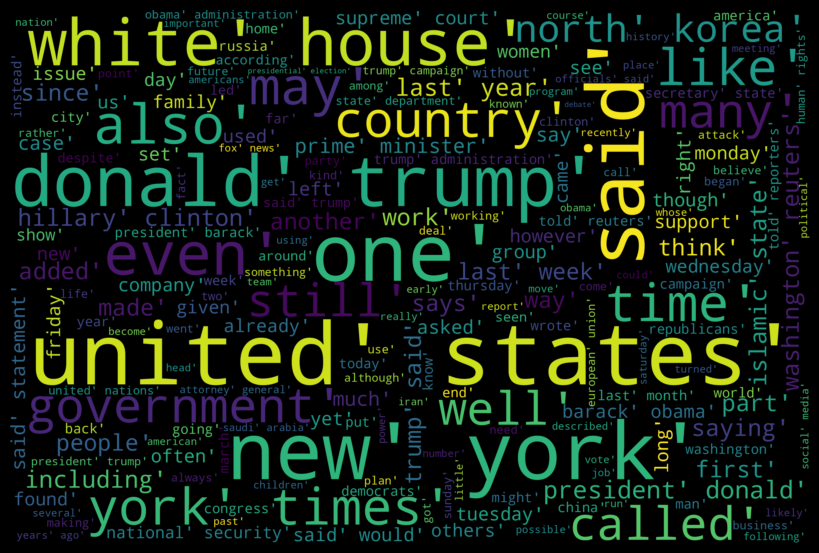

In [ ]:
def plot_word_cloud(text):
  #text = text.Sentence.values
  wordcloud = WordCloud(
      width = 3000,
      height = 2000,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (8,6),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

print("False Word Cloud")
plot_word_cloud(wf_false_words)

print("True Word Cloud")
plot_word_cloud(wf_true_words)